## Problem statement:
### Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

### Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  

- Historical data of demand for a product-center combination (Weeks: 1 to 145)
- Product(Meal) features such as category, sub-category, current price and discount
- Information for fulfillment center like center area, city information etc.

## Tools and technologies used: 
* Python: Programming language
* Pandas: For data cleaning
* Matplotlib: For data visualisation
* sklearn: For model building

In [2]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Load dataset

In [4]:
train_data_path = os.path.join("..","data", "raw", "train_data.csv")
test_data_path = os.path.join("..","data", "raw", "test_data.csv")
fullfilment_info_path = os.path.join("..","data", "raw", "fulfilment_center_info.csv")
meal_info_path = os.path.join("..","data", "raw", "meal_info.csv")

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
fullfilment_info = pd.read_csv(fullfilment_info_path)
meal_info = pd.read_csv(meal_info_path)

In [5]:
train.head(3)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189


In [6]:
test.head(3)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0


In [7]:
fullfilment_info.head(3)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0


In [8]:
meal_info.head(5)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


# Merging datasets to create train data

#### Merge train with fulfillment_info on center_id

In [9]:
train_full=pd.merge(fullfilment_info, train, on='center_id',how='left')
train_full.head(3) 

,center_id,city_code,region_code,center_type,op_area,id,week,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,11,679,56,TYPE_A,3.7,1103215,1,1885,136.83,136.83,0,0,959
1,11,679,56,TYPE_A,3.7,1093939,1,1993,133.89,133.89,0,0,1052
2,11,679,56,TYPE_A,3.7,1120771,1,2539,133.86,135.86,0,0,379


### Merge the result(train_full) with meal_info on meal_id

In [10]:
final_train_df= pd.merge(meal_info, train_full, on='meal_id',how='left')
final_train_df.head(3)

,meal_id,category,cuisine,center_id,city_code,region_code,center_type,op_area,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1885,Beverages,Thai,11,679,56,TYPE_A,3.7,1103215,1,136.83,136.83,0,0,959
1,1885,Beverages,Thai,11,679,56,TYPE_A,3.7,1091356,2,133.86,135.86,0,0,1054
2,1885,Beverages,Thai,11,679,56,TYPE_A,3.7,1195933,3,135.86,133.86,0,0,891


### Check shape of final train data.

In [11]:
print("Number of rows in train data:",final_train_df.shape[0])
print("Number of columns in train data:",final_train_df.shape[1])

Number of rows in train data: 456548
Number of columns in train data: 15


# Merging datasets to create test data

#### Merge test with fulfillment_info on center_id

In [12]:
test_full=pd.merge(fullfilment_info, test, on='center_id',how='left')
test_full.head(3) 

,center_id,city_code,region_code,center_type,op_area,id,week,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,11,679,56,TYPE_A,3.7,1098228,146,1885,158.17,157.17,0,0
1,11,679,56,TYPE_A,3.7,1101375,146,1993,159.14,159.14,0,0
2,11,679,56,TYPE_A,3.7,1400016,146,2539,159.11,158.11,0,0


### Merge the result(test_full) with meal_info on meal_id

In [13]:
final_test_df=pd.merge(meal_info, test_full, on='meal_id',how='left')
final_test_df.tail(3) 

,meal_id,category,cuisine,center_id,city_code,region_code,center_type,op_area,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured
32570,1445,Seafood,Continental,51,638,56,TYPE_A,7.0,1004884,153,727.53,726.53,0,0
32571,1445,Seafood,Continental,51,638,56,TYPE_A,7.0,1292684,154,727.53,727.53,0,0
32572,1445,Seafood,Continental,51,638,56,TYPE_A,7.0,1181766,155,678.03,678.03,0,0


### Check shape of final test data.

In [14]:
print("Number of rows in test data:",final_test_df.shape[0])
print("Number of columns in test data:",final_test_df.shape[1])

Number of rows in test data: 32573
Number of columns in test data: 14


# Check column names and data types.

In [15]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   meal_id                456548 non-null  int64  
 1   category               456548 non-null  object 
 2   cuisine                456548 non-null  object 
 3   center_id              456548 non-null  int64  
 4   city_code              456548 non-null  int64  
 5   region_code            456548 non-null  int64  
 6   center_type            456548 non-null  object 
 7   op_area                456548 non-null  float64
 8   id                     456548 non-null  int64  
 9   week                   456548 non-null  int64  
 10  checkout_price         456548 non-null  float64
 11  base_price             456548 non-null  float64
 12  emailer_for_promotion  456548 non-null  int64  
 13  homepage_featured      456548 non-null  int64  
 14  num_orders             456548 non-nu

In [16]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   meal_id                32573 non-null  int64  
 1   category               32573 non-null  object 
 2   cuisine                32573 non-null  object 
 3   center_id              32573 non-null  int64  
 4   city_code              32573 non-null  int64  
 5   region_code            32573 non-null  int64  
 6   center_type            32573 non-null  object 
 7   op_area                32573 non-null  float64
 8   id                     32573 non-null  int64  
 9   week                   32573 non-null  int64  
 10  checkout_price         32573 non-null  float64
 11  base_price             32573 non-null  float64
 12  emailer_for_promotion  32573 non-null  int64  
 13  homepage_featured      32573 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 3.5+ 

# Summary statistics of numerical columns

In [17]:
final_train_df.describe()

,meal_id,center_id,city_code,region_code,op_area,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,2024.337458,82.105796,601.553399,56.614566,4.083590,1.250096e+06,74.768771,332.238933,354.156627,0.081152,0.10920,261.872760
std,547.420920,45.975046,66.195914,17.641306,1.091686,1.443548e+05,41.524956,152.939723,160.715914,0.273069,0.31189,395.922798
min,1062.000000,10.000000,456.000000,23.000000,0.900000,1.000000e+06,1.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1558.000000,43.000000,553.000000,34.000000,3.600000,1.124999e+06,39.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1993.000000,76.000000,596.000000,56.000000,4.000000,1.250184e+06,76.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,2539.000000,110.000000,651.000000,77.000000,4.500000,1.375140e+06,111.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,2956.000000,186.000000,713.000000,93.000000,7.000000,1.499999e+06,145.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [18]:
final_test_df.describe()

,meal_id,center_id,city_code,region_code,op_area,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured
count,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,3.257300e+04,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000
mean,2032.067909,81.901728,601.519971,56.712154,4.087726,1.248476e+06,150.477819,341.854440,356.493615,0.066435,0.081356
std,547.199004,45.950455,65.996677,17.641174,1.098835,1.441580e+05,2.864072,153.893886,155.150101,0.249045,0.273385
min,1062.000000,10.000000,456.000000,23.000000,0.900000,1.000085e+06,146.000000,67.900000,89.240000,0.000000,0.000000
25%,1558.000000,43.000000,556.000000,34.000000,3.600000,1.123969e+06,148.000000,214.430000,243.500000,0.000000,0.000000
50%,1993.000000,76.000000,596.000000,56.000000,4.000000,1.247296e+06,150.000000,320.130000,321.130000,0.000000,0.000000
75%,2569.000000,110.000000,651.000000,77.000000,4.500000,1.372971e+06,153.000000,446.230000,455.930000,0.000000,0.000000
max,2956.000000,186.000000,713.000000,93.000000,7.000000,1.499996e+06,155.000000,1113.620000,1112.620000,1.000000,1.000000


# Summary statistics of categorical columns

In [19]:
final_train_df.describe(include="object")

,category,cuisine,center_type
count,456548,456548,456548
unique,14,4,3
top,Beverages,Italian,TYPE_A
freq,127890,122925,262881


In [20]:
final_test_df.describe(include="object")

,category,cuisine,center_type
count,32573,32573,32573
unique,14,4,3
top,Beverages,Italian,TYPE_A
freq,8891,8836,18716


# Check for missing values

In [21]:
final_train_df.isna().sum()

meal_id                  0
category                 0
cuisine                  0
center_id                0
city_code                0
region_code              0
center_type              0
op_area                  0
id                       0
week                     0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [22]:
final_train_df.isna().sum()

meal_id                  0
category                 0
cuisine                  0
center_id                0
city_code                0
region_code              0
center_type              0
op_area                  0
id                       0
week                     0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

### Visualize missing values

In [23]:
# plt.figure(figsize=(10, 5))
# sns.heatmap(final_train_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
# plt.title("Missing values heatmap of train data")
# plt.show()


In [24]:
# plt.figure(figsize=(10, 5))
# sns.heatmap(final_test_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
# plt.title("Missing values heatmap of test data")
# plt.show()

# Check for Duplicates

In [25]:
print("Number of duplicate rows in  test data:", final_train_df.duplicated().sum())

Number of duplicate rows in  test data: 0


In [26]:
print("Number of duplicate rows in  train data:", final_test_df.duplicated().sum())

Number of duplicate rows in  train data: 0


# Univariate Analysis

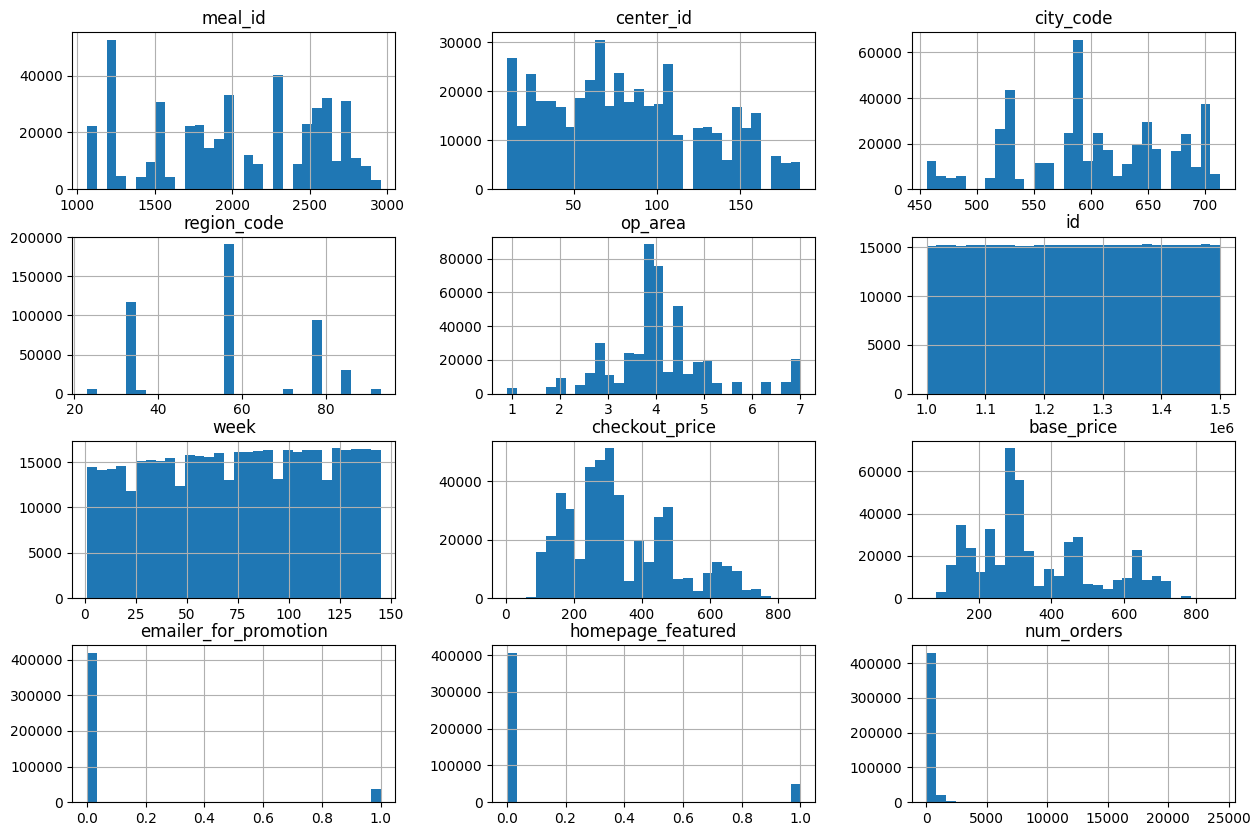

In [27]:
############# Histogram for numerical features ###########
final_train_df.hist(figsize=(15, 10), bins=30)
plt.show()

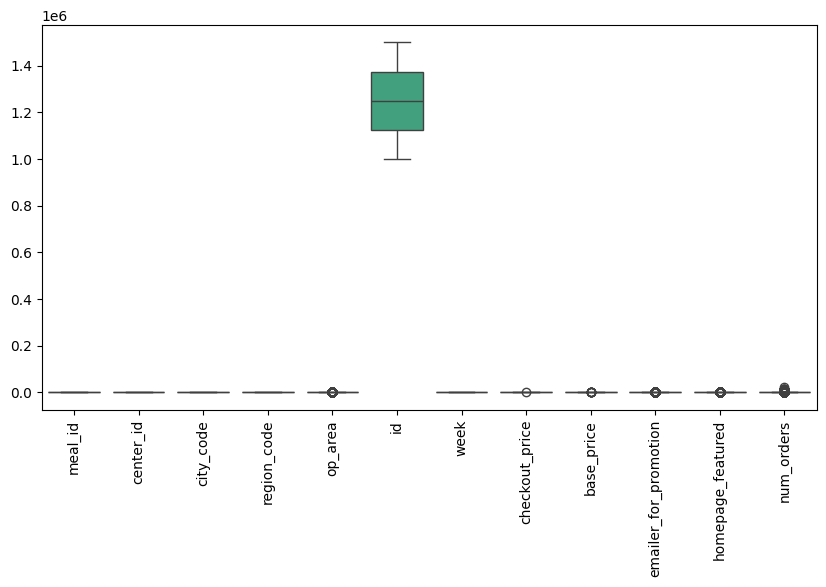

In [28]:
##################### Boxplot for outlier detection ##################
plt.figure(figsize=(10, 5))
sns.boxplot(data=final_train_df)
plt.xticks(rotation=90)
plt.show()


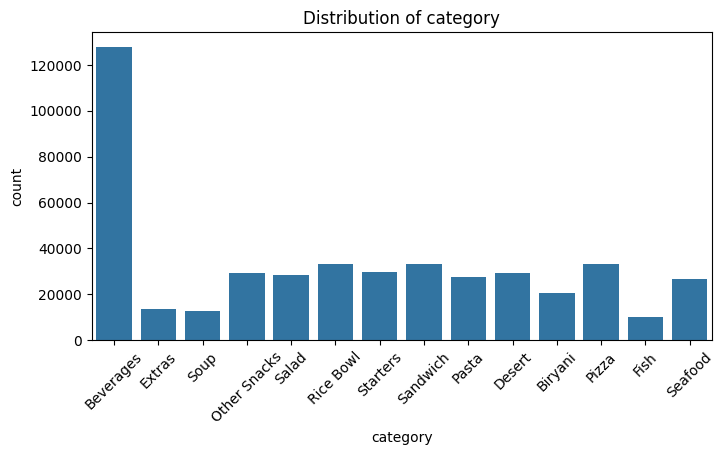

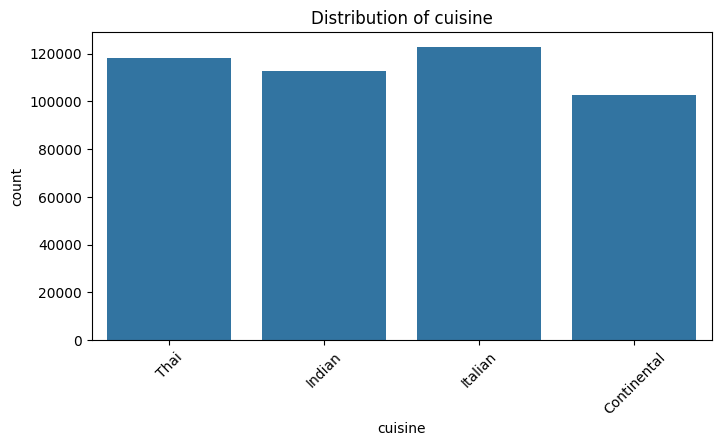

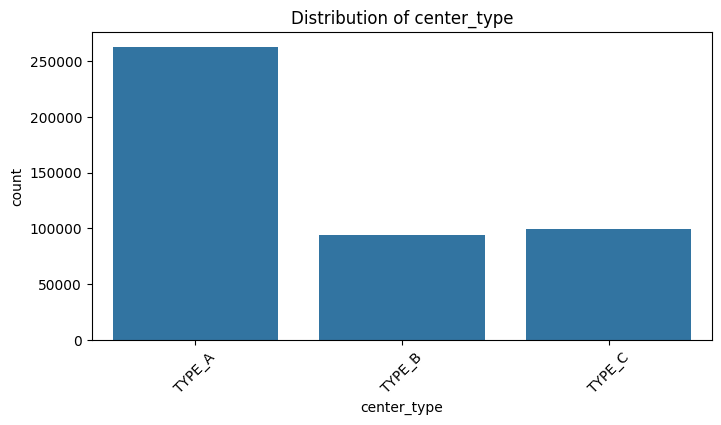

In [29]:
################# Count plot for categorical variables #####################
for col in final_train_df.select_dtypes(include="object"):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=final_train_df[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()